# **Background**

Perusahaan "Wonderful Life Insurance" sebuah startup yang bergerak di bidang asuransi perjalanan, menghadapi tantangan besar dalam memberikan layanan klaim asuransi kepada pelanggannya. Setiap tahun, ribuan pelaku perjalanan internasional membeli polis asuransi. Banyak dari mereka mengajukan klaim atas kejadian yang dialami selama perjalanan, seperti kecelakaan, kehilangan barang, atau pembatalan perjalanan. Namun, tidak semua klaim dapat diterima, karena beberapa mungkin tidak memenuhi syarat yang telah ditentukan.

Pengelolaan klaim yang tidak efisien dapat mengakibatkan:

1. Peningkatan Beban Kerja: Tim klaim harus memeriksa secara manual setiap pengajuan klaim, yang membutuhkan waktu dan sumber daya yang besar.
2. Pengurangan Kualitas Pelayanan: Penundaan dalam memproses klaim dapat membuat pelanggan tidak puas.
3. Risiko Keuangan: Pengajuan klaim yang tidak layak namun tetap disetujui dapat meningkatkan beban finansial perusahaan.
4. Kurangnya Akurasi: Sulit membedakan klaim yang valid dan tidak valid tanpa pola yang jelas.

Oleh karena itu, perusahaan (Wonderful Life Insurance) memutuskan untuk mengembangkan ML modeling guna membantu menentukan apakah seseorang berhak menerima klaim atau tidak dari dataset yang sudah dijadikan bahan analisa

## Problem Statement
1. Masalah Utama:

   Banyak klaim asuransi yang diajukan oleh pelanggan perjalanan ke luar negeri, namun tidak semua klaim layak diterima. Agency menghadapi tantangan dalam mengidentifikasi klaim yang valid dan menghindari pembayaran klaim yang tidak seharusnya, sehingga diperlukan model yang dapat mengklasifikasikan klaim dengan lebih efisien dan akurat.

2. Pertanyaan Analitis:
    * Fitur apa saja yang memiliki hubungan paling signifikan dengan status klaim (Claim)?
    * Apakah durasi perjalanan atau tujuan tertentu meningkatkan kemungkinan klaim?
    * Apakah faktor demografis seperti usia atau gender memengaruhi validitas klaim?
    * Bagaimana pengaruh jenis produk asuransi atau saluran distribusi terhadap klaim?
    * Apakah ada pola klaim berdasarkan nilai penjualan polis atau besaran komisi yang diterima agensi?

## Goals
1. Memperoleh keuntungan. WLI membutuhkan produk-produk asuransi yang profitable, namun juga costumer oriented.
2. Mengembangkan model machine learning untuk memprediksi status klaim pelanggan berdasarkan fitur-fitur yang tersedia.
    Mengidentifikasi faktor risiko yang memengaruhi validitas klaim, sehingga dapat digunakan untuk penyusunan strategi mitigasi risiko.
    Meningkatkan efisiensi operasional dengan mengotomatisasi proses penilaian klaim. 
3. Meningkatkan efisiensi operasional dengan memproses klaim lebih cepat melalui model otomatisasi.
4. Mengurangi pengeluaran dan risiko finansial dengan menolak klaim yang tidak valid.
5. Memberikan layanan yang lebih baik kepada pelanggan dengan mempercepat proses pengambilan keputusan.

## Analytical Approach
1. Eksplorasi Data (Exploratory Data Analysis, EDA):
*Memahami pola data, distribusi fitur, serta hubungan antara fitur-fitur dan variabel target (Claim)*
2. Pre-processing Data : *Mempersiapkan data agar dapat digunakan dalam pemodelan dengan kualitas terbaik*
3. Feature Selection : *Memilih fitur yang paling relevan untuk memprediksi status klaim*
4. Pemodelan Machine Learning : *Membangun model prediksi klaim yang andal*
5. Evaluation Model : *Memastikan model memberikan prediksi yang akurat dan relevan*
6. Feature Importance : *Menentukan fitur mana yang paling signifikan sehingga dapat memberikan wawasan strategis untuk perusahaan*
7. Exporting best model & show Recomendation : *Mengimplementasikan model terbaik ke dalam sistem klaim perusahaan dan memberikan rekomendasi berbasis hasil analisis*

# **About Dataset**

Dataset Source: https://www.kaggle.com/datasets/mhdzahier/travel-insurance

*Penjelasan tentang dataset*

Asuransi perjalanan merupakan salah satu jenis asuransi yang memberikan perlindungan selama kita melakukan perjalanan baik di dalam negeri maupun luar negeri. Beberapa negara bahkan telah mewajibkan para pelancong untuk memiliki asuransi perjalanan, misalnya negara-negara di Eropa dan Amerika. Besarnya premi tergantung pada cakupan yang diinginkan, lamanya perjalanan, dan tujuan perjalanan. Perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui pemegang polis yang akan mengajukan klaim asuransi untuk mendapatkan cakupan. Data pemegang polis pada perusahaan asuransi merupakan data historis yang terdiri dari destinasi, produk asuransi, dan sebagainya.

**Fitur**
*Target: Kolom Claim*
-	Agency Type: Jenis agensi asuransi perjalanan.
-	Distribution Channel: Saluran agensi asuransi perjalanan.
-	Product Name: Nama produk asuransi perjalanan.
-	Gender: Jenis kelamin tertanggung.
-	Duration: Durasi perjalanan.
-	Destination: Tujuan/Destinasi perjalanan
-	Net Sales: Jumlah penjualan polis asuransi perjalanan.
-	Commission (in value): Komisi yang diterima untuk agensi asuransi perjalanan.
-	Age: Usia tertanggung.
-	Claim: Status Klaim

## Import Library yg akan digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer, make_column_selector
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.feature_selection import SelectPercentile
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

# Save Model
import pickle

# **Load Dataset & EDA**

In [3]:
df = pd.read_csv("C:/Users/Windows 10/Documents/Capstone Module 3/data_travel_insurance.csv", low_memory=False)
df_backup = pd.read_csv("C:/Users/Windows 10/Documents/Capstone Module 3/data_travel_insurance.csv")
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [4]:
# Analisa data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


## Data Cleaning

In [5]:
#Ubah kolom 'Claim' (target) menjadi nilai 0 dan 1
df['Claim'] = np.where(df['Claim']=='Yes', 1, 0)

In [6]:
#Ubah nama kolom 'Commision' (in value) menjadi 'Commision' saja
df = df.rename(columns = {'Commision (in value)':'Commision'})
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,0


In [7]:
#Cari unique value

pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,object,31647,71.39,2,"[F, nan, M]"
5,Duration,int64,0,0.00,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,object,0,0.00,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,float64,0,0.00,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision,float64,0,0.00,915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
9,Age,int64,0,0.00,89,"[57, 33, 26, 59, 28, 36, 22, 39, 2

## Missing Values

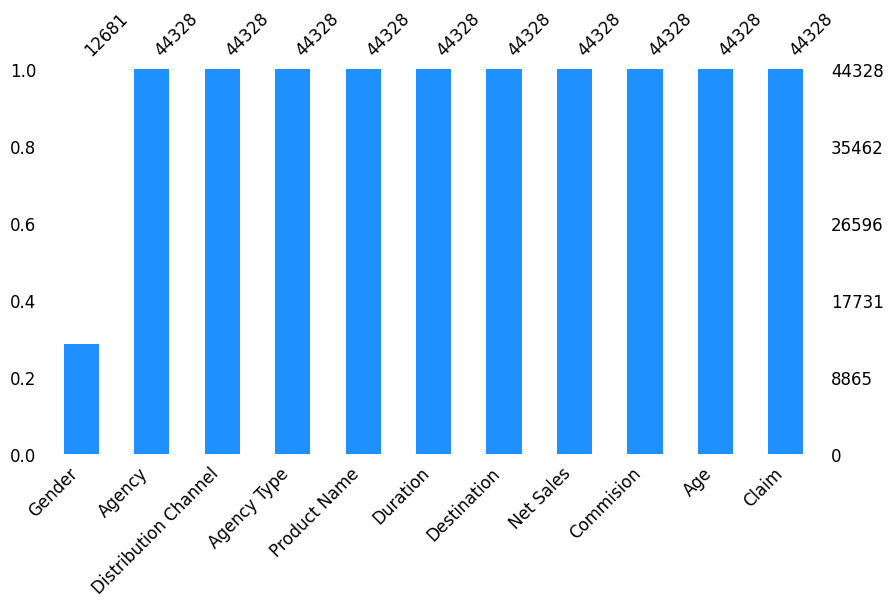

In [8]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

<Axes: >

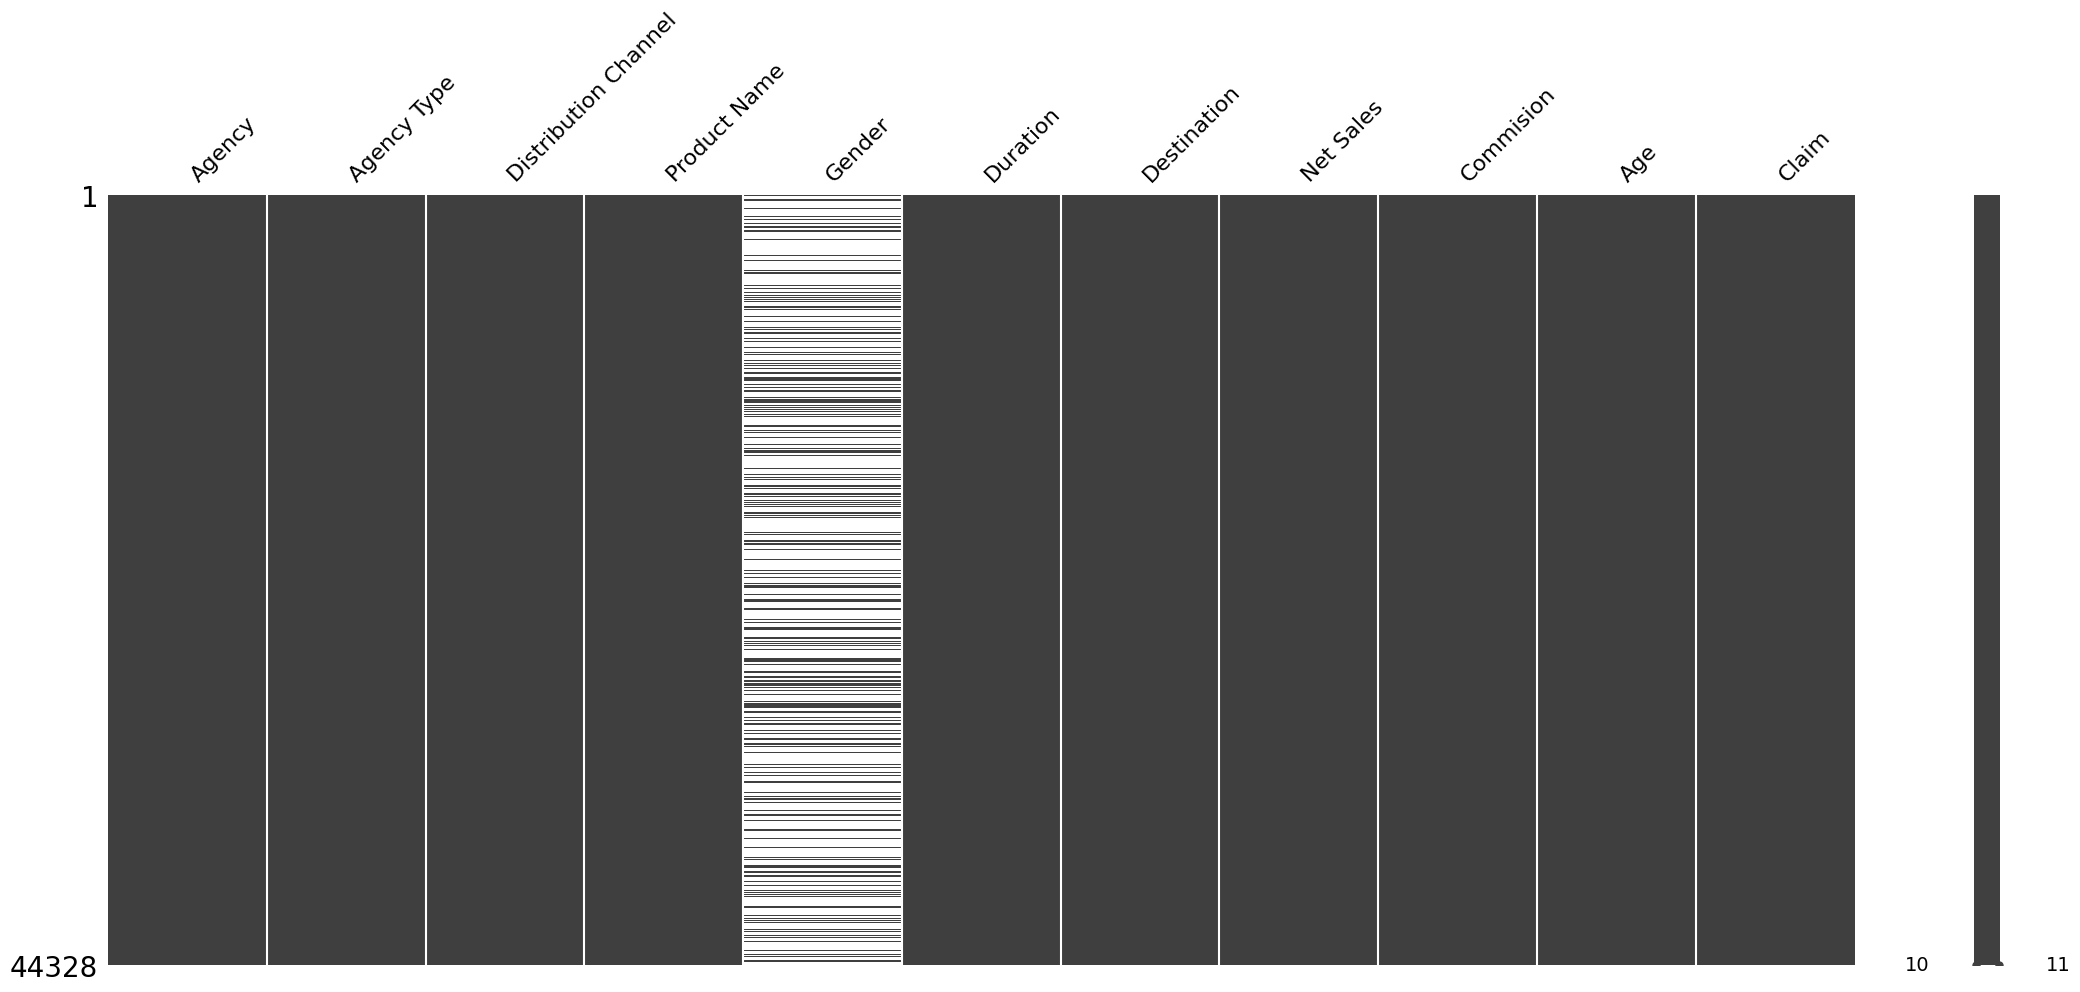

In [9]:
missingno.matrix(df)

Dengan menggunakan visualisasi data dalam bentuk Barplot dan Matrix dapat dilihat hanya kolom Gender yang memiliki data kosong dan kolom tersebut hanya terisi sebanyak 25% saja.

Kolom Gender hanya berkorelasi dengan kolom Age (usia), oleh karena itu kita perlu mengelompokan jumlah data kosong berdasarkan rentang usia.

In [10]:
pd.DataFrame({
    'age_range':['10-19', '20-29', '30-39', '40-49', '50 or above'],
    'missing_values':[
        df[(df['Age']>=10) & (df['Age']<20)]['Gender'].isna().sum(),
        df[(df['Age']>=20) & (df['Age']<30)]['Gender'].isna().sum(),
        df[(df['Age']>=30) & (df['Age']<40)]['Gender'].isna().sum(),
        df[(df['Age']>=40) & (df['Age']<50)]['Gender'].isna().sum(),
        df[(df['Age']>=50)]['Gender'].isna().sum(),
    ]
})

,age_range,missing_values
0,10-19,26
1,20-29,2768
2,30-39,22059
3,40-49,3763
4,50 or above,3031


Dapat dilihat dari DataFrame pengelompokan data dengan nilai kosong berdasarkan rentang usia bahwa mayoritas yang tidak mencantumkan jenis kelamin mereka saat mengajukan asuransi perjalanan berada di rentang usia 30-39 tahun.

Meski demikian, pengajuan asuransi perjalanan biasanya mengharuskan pemohon untuk mengisi data secara lengkap dan benar, tidak boleh ada data yang tidak diisi dan dibiarkan kosong. Jadi kita harus menghapus semua data dengan nilai kosong agar kita dapat membuat model dan algoritma Machine Learning dan menghasilkan data yang diprediksi secara lengkap dan akurat, dan juga untuk memenuhi persyaratan pengisian data lengkap yang dibutuhkan oleh mayoritas agen penyedia asuransi perjalanan.

In [11]:
df['Gender'].isna().sum()

np.int64(31647)

In [12]:
#Menghapus data dengan nilai kosong (Missing Values) dan menghapus kolom Gender
df = df.dropna().reset_index(drop=True)
df = df.drop(['Gender'], axis=1)
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
2,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
3,JZI,Airlines,Online,Basic Plan,4,THAILAND,22.0,7.70,39,0
4,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,27,0
...,...,...,...,...,...,...,...,...,...,...
12676,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,11,CHINA,49.5,32.18,84,0
12677,JZI,Airlines,Online,Basic Plan,13,THAILAND,22.0,7.70,42,0
12678,JZI,Airlines,Online,Value Plan,11,UNITED KINGDOM,87.0,30.45,65,0
12679,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.50,0,0


Telah terhapus 31,647 baris data yang memiliki nilai Gender kosong (Missing Values) dalam dataset. Namun kita juga perlu menghapus data duplikat untuk menghindari terjadinya Overfitting dalam model Machine Learning yang akan diterapkan dalam project ini.

Selain menghapus nilai kosong, penulis juga memutuskan untuk membuang kolom Gender dikarenakan tidak adanya pengaruh kolom Gender terhadap model Machine Learning yang akan diterapkan. Tidak semua kolom variabel kategorikal dan numerikal bisa mempengaruhi model Machine Learning walaupun ada yang mempunyai korelasi dengan beberapa variabel lain.

## Duplicate Values

In [13]:
df.duplicated(keep='first').sum()

np.int64(1001)

In [14]:
#Menghapus duplikat data
df = df.drop_duplicates(keep='first').reset_index(drop=True)
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
2,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
3,JZI,Airlines,Online,Basic Plan,4,THAILAND,22.0,7.70,39,0
4,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,27,0
...,...,...,...,...,...,...,...,...,...,...
11675,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,11,CHINA,49.5,32.18,84,0
11676,JZI,Airlines,Online,Basic Plan,13,THAILAND,22.0,7.70,42,0
11677,JZI,Airlines,Online,Value Plan,11,UNITED KINGDOM,87.0,30.45,65,0
11678,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.50,0,0


Telah terhapus 1,001 baris data duplikat yang tersisa dalam dataset.
mari kita cek outliers dalam dataset kita

## Outliers

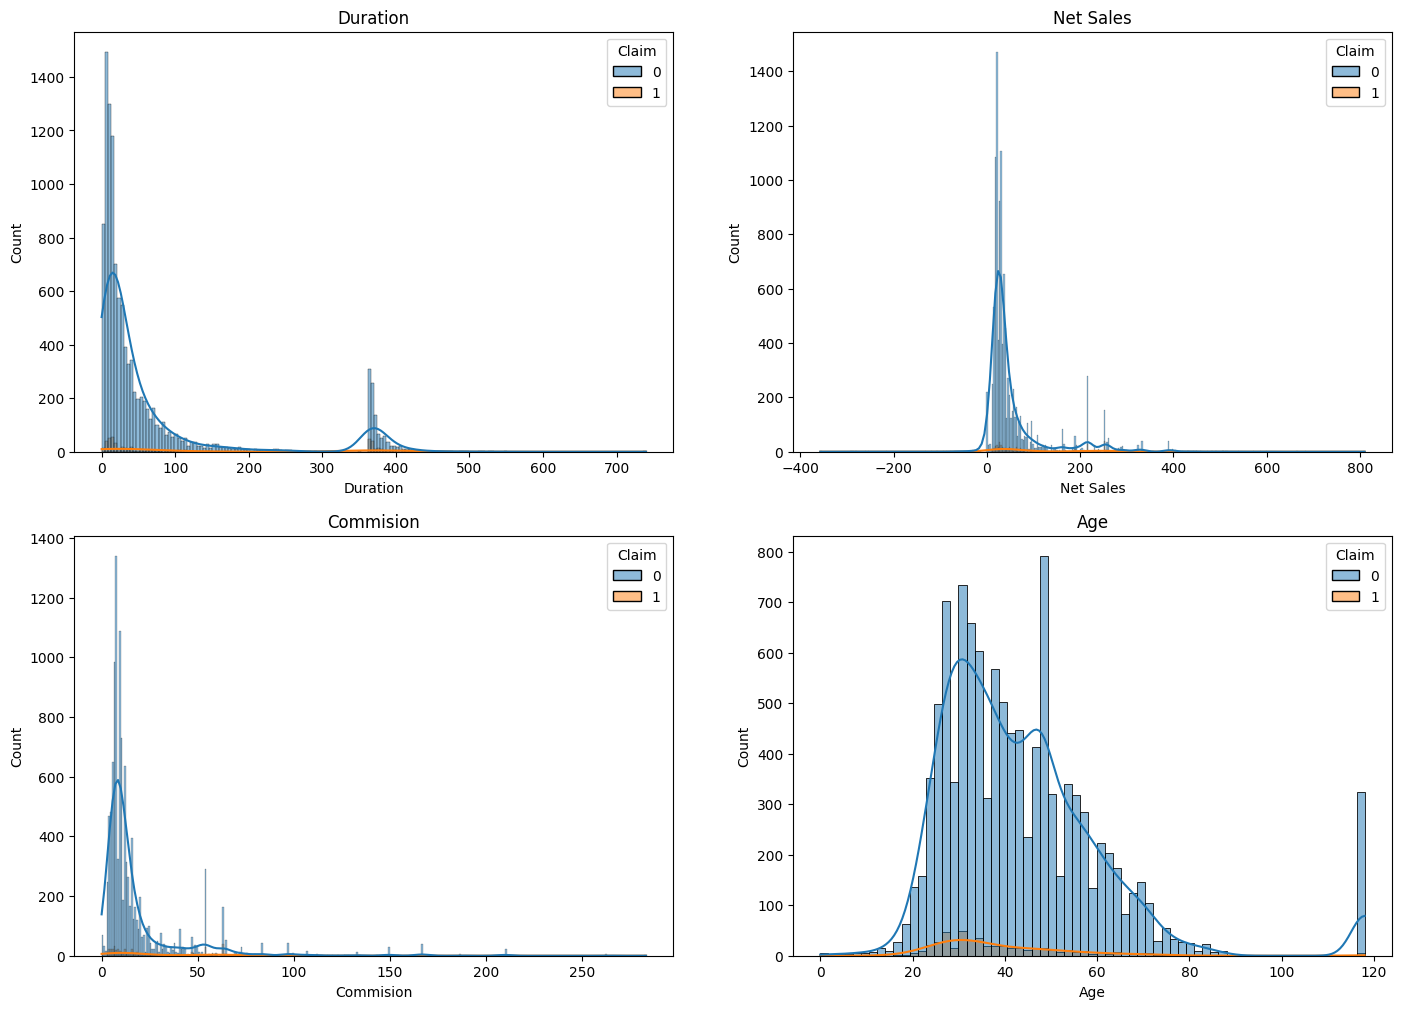

In [15]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='Duration',hue='Claim',kde=True)
plt.title('Duration')

plt.subplot(222)
sns.histplot(data=df,x='Net Sales',hue='Claim',kde=True)
plt.title('Net Sales')

plt.subplot(223)
sns.histplot(data=df,x='Commision',hue='Claim',kde=True)
plt.title('Commision')

plt.subplot(224)
sns.histplot(data=df,x='Age',hue='Claim',kde=True)
plt.title('Age')

plt.show()

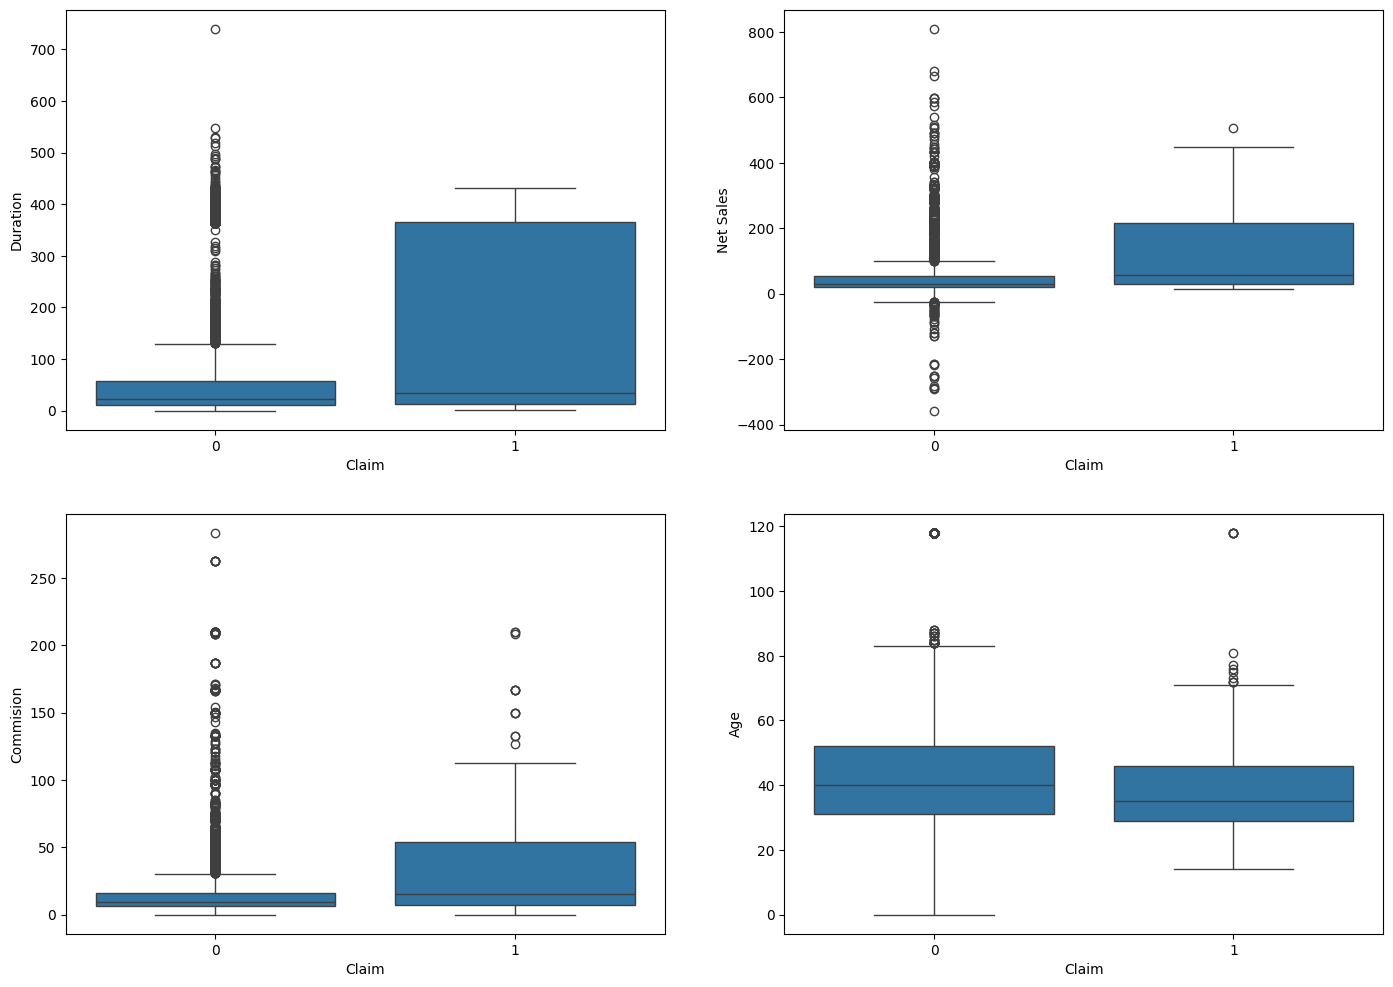

In [16]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.boxplot(data=df,y='Duration', x='Claim')

plt.subplot(222)
sns.boxplot(data=df,y='Net Sales', x='Claim')

plt.subplot(223)
sns.boxplot(data=df,y='Commision', x='Claim')

plt.subplot(224)
sns.boxplot(data=df,y='Age', x='Claim')
plt.show()

In [17]:
df.describe()

,Duration,Net Sales,Commision,Age,Claim
count,11680.000000,11680.000000,11680.000000,11680.000000,11680.000000
mean,69.112329,57.565016,18.538170,43.558818,0.040325
std,111.584324,73.919385,25.144105,18.591078,0.196730
min,0.000000,-357.500000,0.000000,0.000000,0.000000
25%,10.000000,22.000000,6.750000,31.000000,0.000000
50%,22.000000,30.000000,9.750000,40.000000,0.000000
75%,59.000000,56.000000,16.900000,51.000000,0.000000
max,740.000000,810.000000,283.500000,118.000000,1.000000


In [18]:
df[df['Claim']==0].describe()

,Duration,Net Sales,Commision,Age,Claim
count,11209.000000,11209.000000,11209.000000,11209.000000,11209.0
mean,66.499063,55.396221,18.014674,43.756178,0.0
std,108.455233,71.562607,24.570236,18.701773,0.0
min,0.000000,-357.500000,0.000000,0.000000,0.0
25%,10.000000,22.000000,6.750000,31.000000,0.0
50%,22.000000,30.000000,9.750000,40.000000,0.0
75%,58.000000,53.500000,16.250000,52.000000,0.0
max,740.000000,810.000000,283.500000,118.000000,0.0


In [19]:
df[df['Claim']==1].describe()

,Duration,Net Sales,Commision,Age,Claim
count,471.000000,471.000000,471.000000,471.000000,471.0
mean,131.303609,109.178662,30.996476,38.861996,1.0
std,157.663536,104.260306,33.938676,14.996172,0.0
min,2.000000,13.500000,0.000000,14.000000,1.0
25%,13.000000,28.500000,7.425000,29.000000,1.0
50%,35.000000,56.500000,15.500000,35.000000,1.0
75%,365.000000,216.000000,54.000000,46.000000,1.0
max,431.000000,507.000000,210.210000,118.000000,1.0


Dapat dilihat bahwa sebagian besar baris Data Outlier adalah data calon pelaku perjalanan yang tidak mengajukan Claim. Meski demikian, data Outlier yang akan dihapus tidak hanya berdasarkan data yang berada di luar rentang kuartil dan median, namun juga berdasarkan persyaratan yang diberlakukan oleh mayoritas agen penyedia asuransi seperti batasan durasi, komisi, dan usia calon pelaku perjalanan yang mengajukan asuransi.

Kita akan menghapus data yang tidak memenuhi syarat, salah satunya adalah data durasi perjalanan yang melebihi 18 bulan/547 hari karena kebanyakan agen penyedia asuransi hanya menawarkan asuransi dengan durasi maksimum 18 bulan. Hanya satu baris data yang tidak memenuhi persyaratan durasi perjalanan tersebut.

Selain itu, ada beberapa data calon pelaku perjalanan dengan usia lebih dari 100 tahun. Mereka diasumsi sudah tidak mampu melakukan perjalanan dikarenakan kondisi kesehatannya atau sudah meninggal sebelum mereka sempat melakukan perjalanan, sehingga data tersebut juga harus dihapus. Data pelaku perjalanan lansia berusia kurang dari 100 tahun tidak dihapus, karena asumsi bahwa mereka masih mampu untuk melakukan perjalanan selama mereka masih sehat secara fisik dan mental.

In [20]:
# Menghapus data durasi Outlier yang melebihi 18 bulan/547 hari
duration_outlier = df[df['Duration']>547]
duration_outlier

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
5882,C2B,Airlines,Online,Annual Silver Plan,740,SINGAPORE,0.0,54.19,36,0


In [21]:
# Menghapus data umur Outlier yang melebihi usia 100 tahun
age_outlier = df[df['Age']>100]
age_outlier

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
28,ART,Airlines,Online,Value Plan,7,MALAYSIA,29.0,10.15,118,0
104,JWT,Airlines,Online,Value Plan,12,INDIA,39.0,15.60,118,0
110,JWT,Airlines,Online,Value Plan,6,INDIA,39.0,15.60,118,0
200,JWT,Airlines,Online,Value Plan,76,INDIA,100.0,40.00,118,0
255,ART,Airlines,Online,Value Plan,137,HONG KONG,61.0,21.35,118,0
...,...,...,...,...,...,...,...,...,...,...
11553,JWT,Airlines,Online,Value Plan,67,INDIA,200.0,80.00,118,0
11558,JWT,Airlines,Online,Value Plan,10,INDIA,50.0,20.00,118,1
11582,JWT,Airlines,Online,Value Plan,83,INDIA,180.0,72.00,118,0
11622,JWT,Airlines,Online,Value Plan,42,INDIA,31.0,12.40,118,0


In [22]:
df = df.drop(duration_outlier.index)
df = df.drop(age_outlier.index).reset_index()
df = df.drop(['index'], axis=1)
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision,Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
2,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
3,JZI,Airlines,Online,Basic Plan,4,THAILAND,22.0,7.70,39,0
4,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,27,0
...,...,...,...,...,...,...,...,...,...,...
11344,LWC,Travel Agency,Online,Single Trip Travel Protect Silver,11,CHINA,49.5,32.18,84,0
11345,JZI,Airlines,Online,Basic Plan,13,THAILAND,22.0,7.70,42,0
11346,JZI,Airlines,Online,Value Plan,11,UNITED KINGDOM,87.0,30.45,65,0
11347,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.50,0,0


Telah terhapus total 330 baris data dengan Outlier, yang mencakup 382 data dengan usia calon pelaku perjalanan lebih dari 100 tahun, dan satu data dengan durasi perjalanan lebih dari 18 bulan.

## Data Analisis

In [23]:
df.describe()

,Duration,Net Sales,Commision,Age,Claim
count,11349.000000,11349.000000,11349.00000,11349.000000,11349.000000
mean,69.836373,57.429676,18.33442,41.394925,0.041061
std,112.727182,74.215704,25.17840,13.779515,0.198440
min,0.000000,-357.500000,0.00000,0.000000,0.000000
25%,10.000000,22.000000,6.75000,30.000000,0.000000
50%,22.000000,30.000000,9.57000,39.000000,0.000000
75%,59.000000,54.500000,16.25000,50.000000,0.000000
max,547.000000,682.000000,262.76000,88.000000,1.000000


In [24]:
df_backup.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


Kita tentukan membuat variable df_backup untuk membandingkan antara dataset DF yang akan dilakukan analisis dan Machine Learning dengan dataset aslinya, yang belum dilakukan penghapusan data duplikat, nilai kosong, dan Outlier sama sekali. 

In [25]:
df_backup['Claim'].value_counts()

Claim
No     43651
Yes      677
Name: count, dtype: int64

In [26]:
df['Claim'].value_counts()

Claim
0    10883
1      466
Name: count, dtype: int64

In [27]:
df_backup['Claim'].value_counts()/len(df_backup['Claim']) * 100

Claim
No     98.472749
Yes     1.527251
Name: count, dtype: float64

In [28]:
df['Claim'].value_counts()/len(df['Claim']) * 100

Claim
0    95.893911
1     4.106089
Name: count, dtype: float64

Jika dilihat bahwa dalam dataset asli 98.4% pelaku perjalanan tidak mengajukan Claim. Namun setelah menghapus Missing Values, Duplicates, dan Outlier dalam variable dataset DF jumlah pelaku perjalanan yang tidak mengajukan Claim berkurang menjadi 95.8%. 

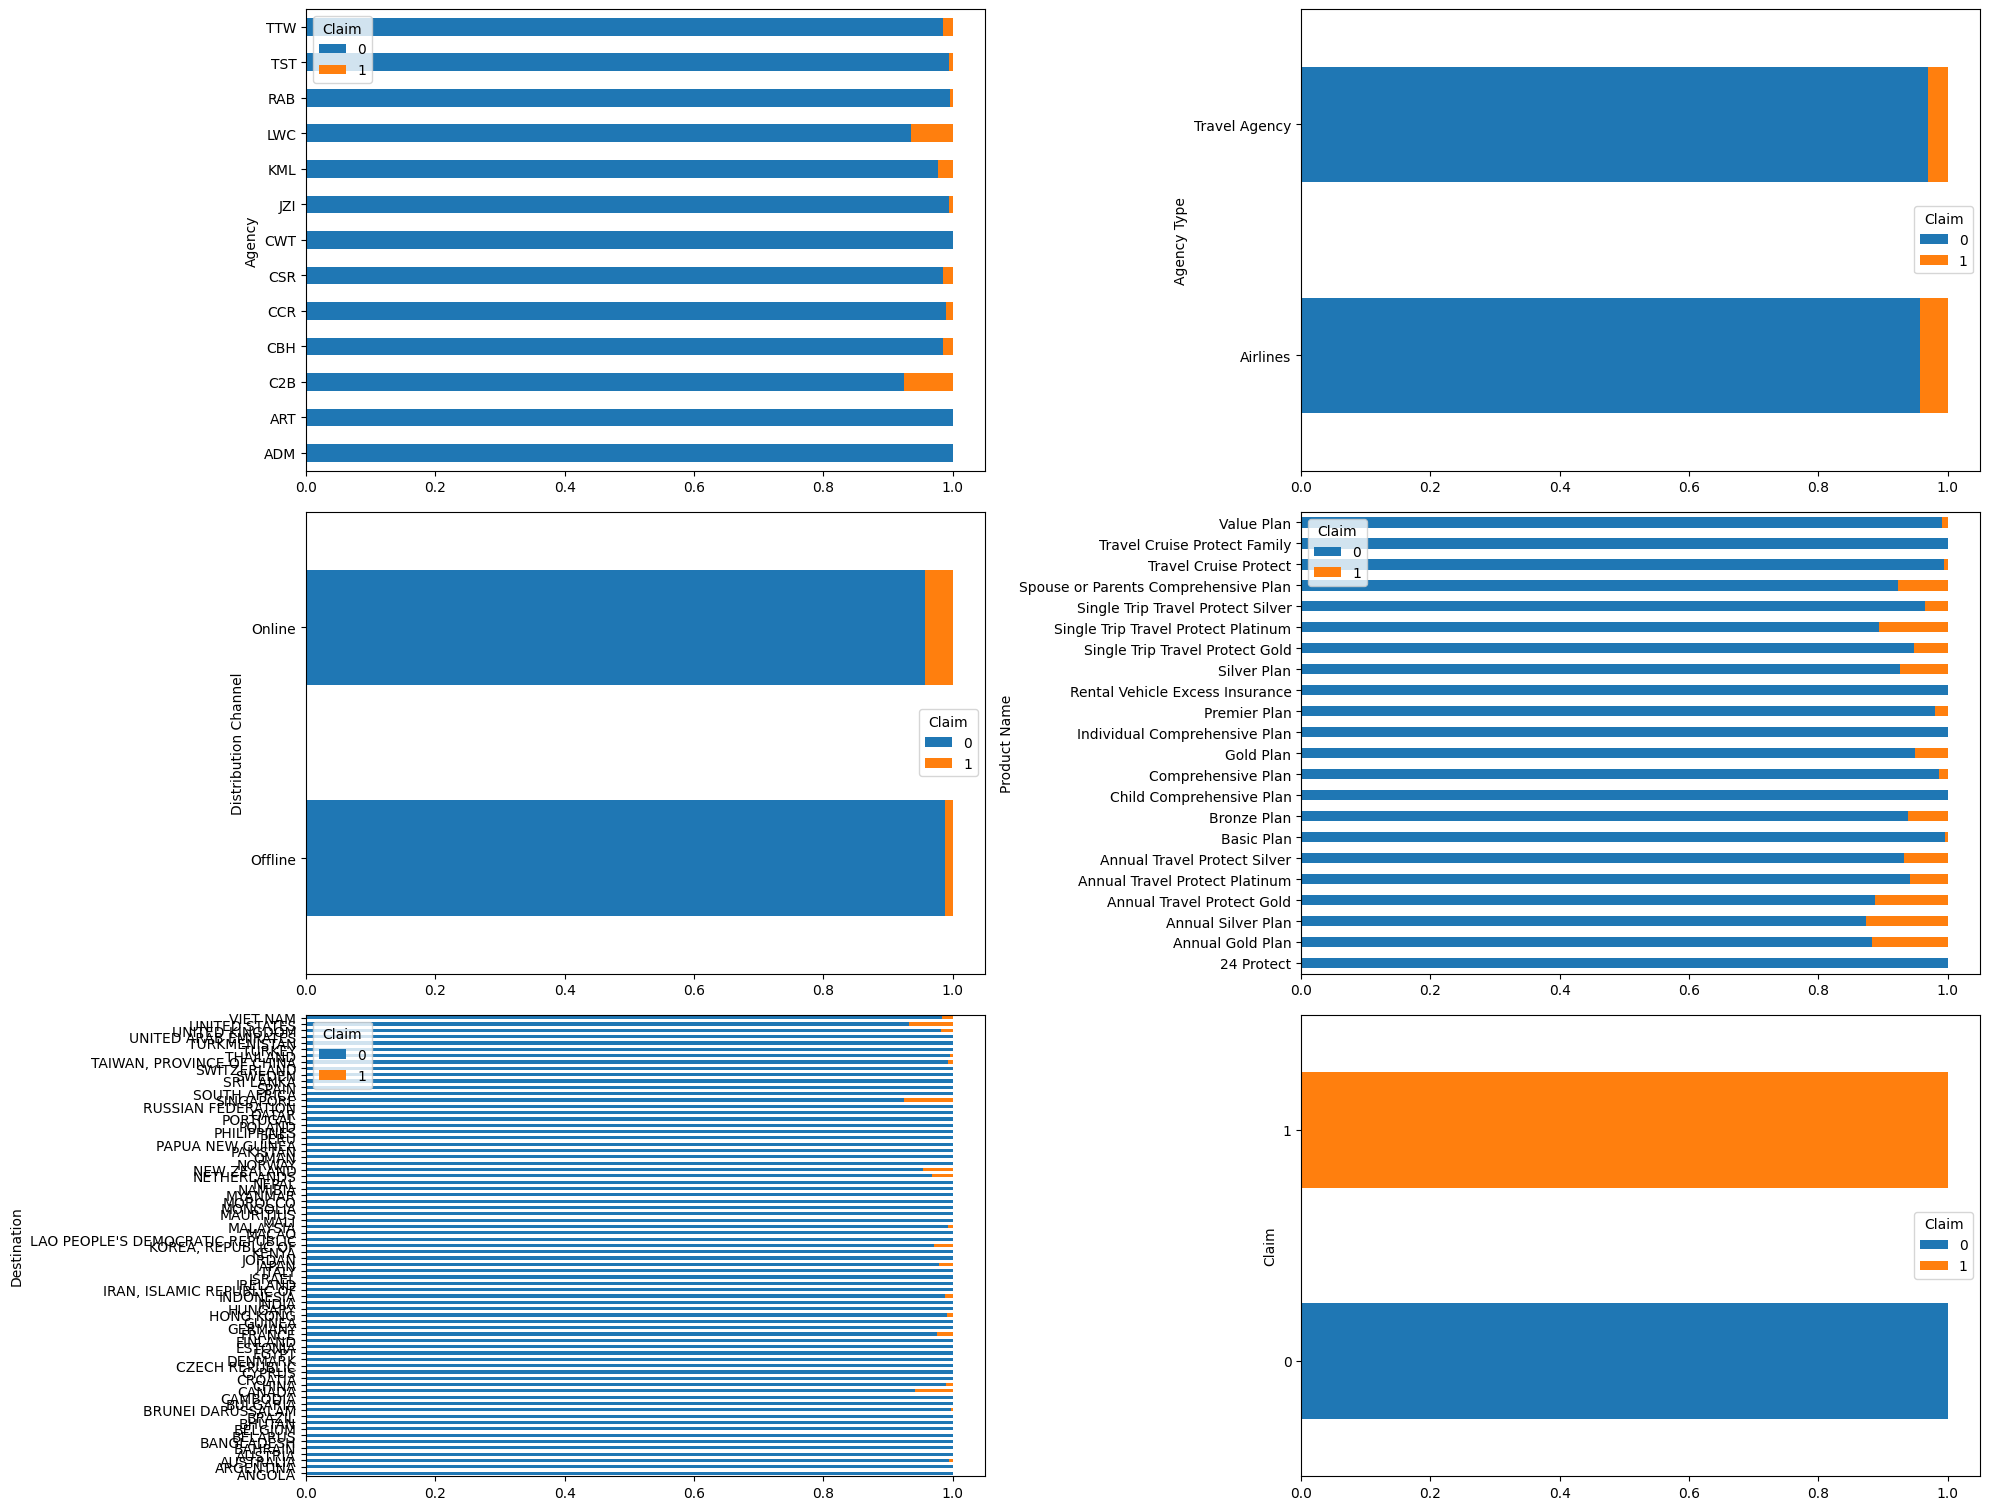

In [29]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['Duration','Net Sales','Commision','Age']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['Claim'], normalize=0).plot(kind='barh',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

Mari kita telusuri pengaruh kolom-kolom tertentu pada predikat claim yg sedang kita analisa

In [30]:
for i in df.drop(columns=['Duration','Net Sales','Commision','Age']).columns:
    analysis_df = df.groupby([i, 'Claim']).size().div(df.groupby(i).size(), level=0).unstack(fill_value=0)
    display(analysis_df.sort_values(by=[1.0], ascending=False))

Claim,0,1
Agency,,
C2B,0.924433,0.075567
LWC,0.935841,0.064159
KML,0.978166,0.021834
TTW,0.984848,0.015152
CBH,0.985075,0.014925
CSR,0.985294,0.014706
CCR,0.989474,0.010526
TST,0.993884,0.006116
JZI,0.994742,0.005258


Claim,0,1
Agency Type,,
Airlines,0.957494,0.042506
Travel Agency,0.969857,0.030143


Claim,0,1
Distribution Channel,,
Online,0.957187,0.042813
Offline,0.988854,0.011146


Claim,0,1
Product Name,,
Annual Silver Plan,0.873821,0.126179
Annual Gold Plan,0.882353,0.117647
Annual Travel Protect Gold,0.887097,0.112903
Single Trip Travel Protect Platinum,0.893617,0.106383
Spouse or Parents Comprehensive Plan,0.923077,0.076923
Silver Plan,0.927027,0.072973
Annual Travel Protect Silver,0.932203,0.067797
Bronze Plan,0.939256,0.060744
Annual Travel Protect Platinum,0.941176,0.058824


Claim,0,1
Destination,,
SINGAPORE,0.925254,0.074746
UNITED STATES,0.931937,0.068063
CANADA,0.941176,0.058824
NEW ZEALAND,0.954545,0.045455
NETHERLANDS,0.968750,0.031250
...,...,...
SPAIN,1.000000,0.000000
SOUTH AFRICA,1.000000,0.000000
TURKEY,1.000000,0.000000


Claim,0,1
Claim,,
1,0.0,1.0
0,1.0,0.0


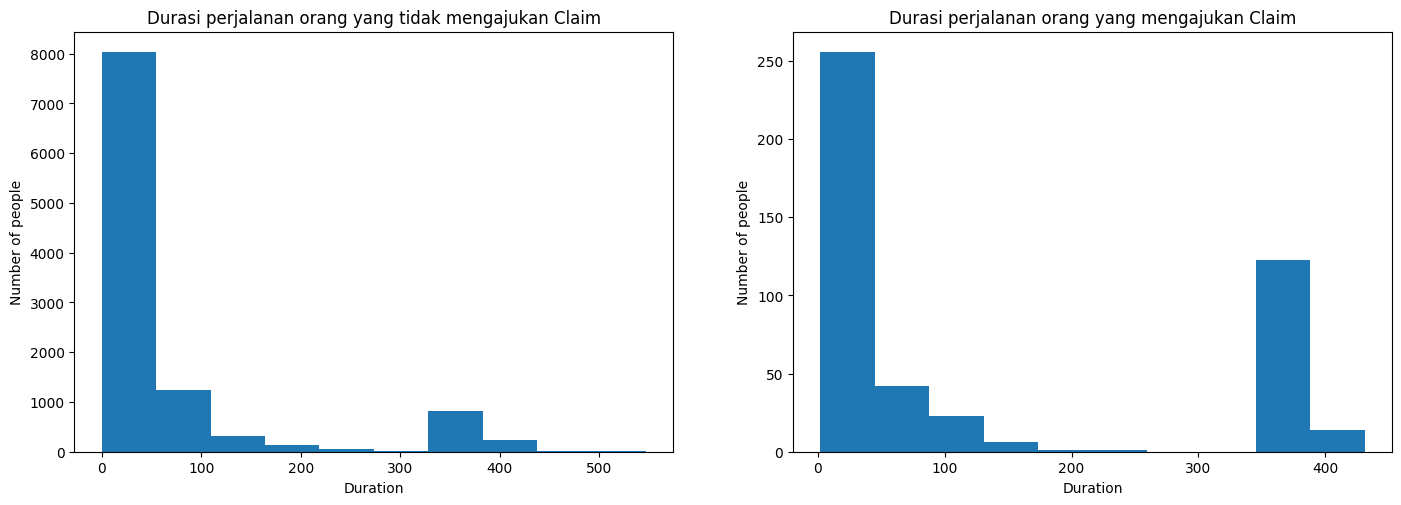

In [31]:
plt.figure(figsize=(17,12))

plt.subplot(221)
plt.hist(df[df['Claim']==0]['Duration'])
plt.xlabel('Duration')
plt.ylabel('Number of people')
plt.title('Durasi perjalanan orang yang tidak mengajukan Claim')

plt.subplot(222)
plt.hist(df[df['Claim']==1]['Duration'])
plt.xlabel('Duration')
plt.ylabel('Number of people')
plt.title('Durasi perjalanan orang yang mengajukan Claim')

plt.show()

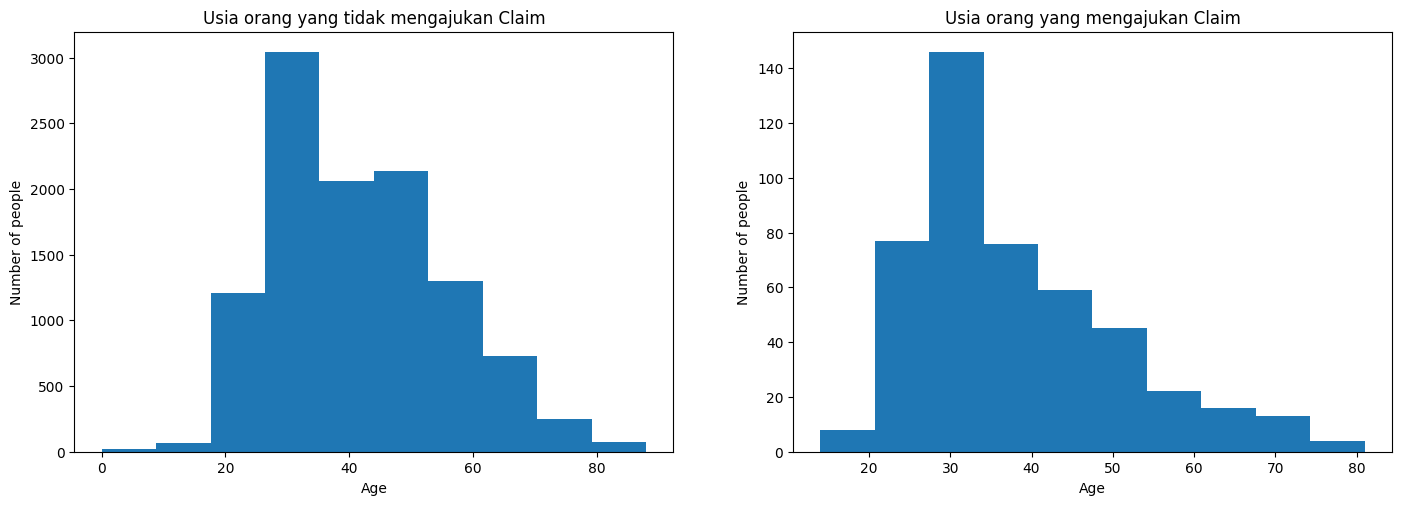

In [32]:
plt.figure(figsize=(17,12))

plt.subplot(221)
plt.hist(df[df['Claim']==0]['Age'])
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Usia orang yang tidak mengajukan Claim')

plt.subplot(222)
plt.hist(df[df['Claim']==1]['Age'])
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Usia orang yang mengajukan Claim')

plt.show()

## Kesimpulan EDA

Berdasarkan barplot, table dan histogram diatas kita dapat menyimpulkan beberapa hal :
1. Claim paling banyak ditemui pada agensi C2B kemudian LWC, KML, dan TTW. Tidak ada Claim yang ditemukan pada agensi ADM, ART, CWT.
2. Claim paling banyak ditemui pada agensi yang bergerak di bidang maskapai penerbangan dibandingkan agen penyedia jasa perjalanan.
3. Claim paling banyak dilakukan oleh calon pelaku perjalanan yang melakukan distribusi Claim melalui kanal daring (*Online*) dibandingkan kanal tatap muka (*Offline*).
4. 5 Produk yang memiliki ratio Claim paling besar adalah Annual Silver Plan, Annual Gold Plan, Annual Travel Protect Gold, Single Trip Travel Protect Platinum & Spouse or Parents Comprehensive Plan. Kelima produk asuransi tersebut biasa dipesan oleh mayoritas calon pelaku perjalanan jangka panjang.
5. 5 destinasi terpopuler oleh calon pelaku perjalanan yang mengajukan Claim adalah Singapura, Amerika Serikat, Kanada, Selandia Baru, dan Belanda. Kelima destinasi tersebut merupakan beberapa destinasi terpopuler saat liburan ke luar negeri.
6. Mayoritas calon pelaku perjalanan (baik yang mengajukan Claim atau tidak) melakukan perjalanan berdurasi kurang dari 50 hari, dikarenakan mereka hanya bepergian dalam jangka waktu pendek.
7. Mayoritas calon pelaku perjalanan yang mengajukan Claim berusia sekitar 30-39 tahun. Meski demikian, sebagian besar pelaku perjalanan secara keseluruhan berusia sekitar 20-59 tahun.

# **Feature Engineering**

Feature Engineering dilakukan dengan cara:

1. Encoding variabel kategorikal menggunakan One Hot (untuk kolom Agency Type dan Distribution Channel yang hanya memiliki 2 data unik) dan Binary (untuk kolom yang memiliki data nominal yang banyak).

2. Scaling Data numerik menggunakan Robust Scaler supaya data tidak dipengaruhi oleh Data Outlier yang melebihi batas Q1 dan Q3.

## Encoding Variables

In [33]:
onehot = OneHotEncoder(drop = 'first')
binary = ce.BinaryEncoder()

onehot_var = ['Agency Type','Distribution Channel','Claim']
binary_var = ['Agency','Product Name','Destination']

In [34]:
trans = ColumnTransformer([
    ('binary', binary, binary_var),
    ('one hot', onehot, onehot_var)
], remainder = 'passthrough')

In [35]:
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination']),
                                ('one hot', OneHotEncoder(drop='first'),
                                 ['Agency Type', 'Distribution Channel',
                                  'Claim'])])

In [36]:
df_encoded = trans.fit_transform(df)
df_encoded = pd.DataFrame(df_encoded)
df_encoded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,57.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,19.0,22.0,7.70,26.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,16.0,4.00,28.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,22.0,7.70,39.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11344,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,49.5,32.18,84.0
11345,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,13.0,22.0,7.70,42.0
11346,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,11.0,87.0,30.45,65.0
11347,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,94.0,30.0,10.50,0.0


In [37]:
trans.transformers_[0][1].get_feature_names_out()

array(['Agency_0', 'Agency_1', 'Agency_2', 'Agency_3', 'Product Name_0',
       'Product Name_1', 'Product Name_2', 'Product Name_3',
       'Product Name_4', 'Destination_0', 'Destination_1',
       'Destination_2', 'Destination_3', 'Destination_4', 'Destination_5',
       'Destination_6'], dtype=object)

In [38]:
trans.transformers_[1][1].get_feature_names_out()

array(['Agency Type_Travel Agency', 'Distribution Channel_Online',
       'Claim_1'], dtype=object)

In [39]:
feature_names = list(trans.transformers_[0][1].get_feature_names_out()) + list(trans.transformers_[1][1].get_feature_names_out()) + ['Duration', 'Net Sales', 'Commision (in value)', 'Age',]
df_encoded.columns = feature_names
df_encoded

,Agency_0,Agency_1,Agency_2,Agency_3,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Destination_0,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Agency Type_Travel Agency,Distribution Channel_Online,Claim_1,Duration,Net Sales,Commision (in value),Age
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,57.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,19.0,22.0,7.70,26.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,16.0,4.00,28.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,22.0,7.70,39.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11344,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,49.5,32.18,84.0
11345,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,13.0,22.0,7.70,42.0
11346,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,11.0,87.0,30.45,65.0
11347,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,94.0,30.0,10.50,0.0


In [40]:
df_encoded.rename({'Claim_1':'Claim'}, axis=1, inplace = True)
df_encoded.rename({'Commision (in value)':'Commision'}, axis=1, inplace = True)
df_encoded.rename({'Agency Type_Travel Agency':'Agency Type'}, axis=1, inplace = True)
df_encoded.rename({'Distribution Channel_Online':'Distribution Channel'}, axis=1, inplace = True)
df_encoded

,Agency_0,Agency_1,Agency_2,Agency_3,Product Name_0,Product Name_1,Product Name_2,Product Name_3,Product Name_4,Destination_0,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Agency Type,Distribution Channel,Claim,Duration,Net Sales,Commision,Age
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,57.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,19.0,22.0,7.70,26.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,8.0,16.0,4.00,28.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,22.0,7.70,39.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,365.0,216.0,54.00,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11344,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,49.5,32.18,84.0
11345,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,13.0,22.0,7.70,42.0
11346,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,11.0,87.0,30.45,65.0
11347,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,94.0,30.0,10.50,0.0


In [41]:
#Define Target & Feature
y = df_encoded['Claim']
x = df_encoded.drop(columns = 'Claim')

#Splitting
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    stratify = y,
    test_size = 0.2, 
    random_state = 2023
)

## Feature Selection

Setelah di encoding, Feature Selection dilakukan dengan metode Select Percentile untuk menentukan variabel mana yang berpengaruh terhadap target, dan juga supaya tidak terjadi Overfitting jika semua variabel digunakan.

In [42]:
x_train.shape[1]

22

In [43]:
select = SelectPercentile(percentile= 50)
select.fit(x_train, y_train)

x_train_selected = select.transform(x_train)
x_test_selected = select.transform(x_test)

In [44]:
x_train_selected.shape[1]

11

In [45]:
x.columns 

Index(['Agency_0', 'Agency_1', 'Agency_2', 'Agency_3', 'Product Name_0',
       'Product Name_1', 'Product Name_2', 'Product Name_3', 'Product Name_4',
       'Destination_0', 'Destination_1', 'Destination_2', 'Destination_3',
       'Destination_4', 'Destination_5', 'Destination_6', 'Agency Type',
       'Distribution Channel', 'Duration', 'Net Sales', 'Commision', 'Age'],
      dtype='object')

Buat feature_names yg menunjukkan nama semua fitur yang telah diproses (melalui encoding dan scaling)

In [46]:
feature_names = ['Agency_0', 'Agency_1', 'Agency_2', 'Agency_3', 'Product Name_0',
       'Product Name_1', 'Product Name_2', 'Product Name_3', 'Product Name_4',
       'Destination_0', 'Destination_1', 'Destination_2', 'Destination_3',
       'Destination_4', 'Destination_5', 'Destination_6', 
       'Agency Type_Travel Agency', 'Distribution Channel_Online', 'Duration',
       'Net Sales', 'Commision (in value)', 'Age']

In [47]:
# Tampilkan fitur yg dipilih
df_features = pd.DataFrame({
    'Features': feature_names,
    'Indicator': select.get_support()
})
df_features[df_features['Indicator']==True]

,Features,Indicator
2,Agency_2,True
3,Agency_3,True
7,Product Name_3,True
8,Product Name_4,True
12,Destination_3,True
13,Destination_4,True
14,Destination_5,True
15,Destination_6,True
18,Duration,True
19,Net Sales,True


In [48]:
feature_true = ['Agency_2', 'Agency_3', 'Product Name_3', 'Product Name_4',
       'Destination_3', 'Destination_4', 'Destination_5', 'Destination_6', 
       'Duration', 'Net Sales', 'Commision']
feature_corr = df_encoded[['Claim', 'Agency Type', 'Distribution Channel', 'Duration',
       'Net Sales', 'Commision', 'Age']]

In [49]:
feature_corr = feature_corr.corr(method='spearman')

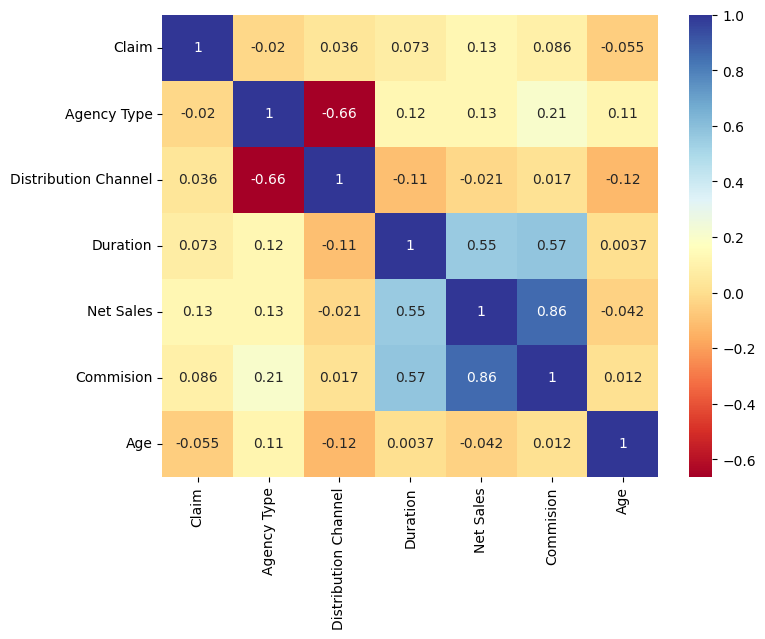

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(feature_corr,annot = True,cmap='RdYlBu')
plt.show()

Dapat dilihat dari Heatmap diatas, hubungan antar fitur utama yakni Claim memiliki korelasi rendah dengan semua fitur (paling tinggi sekitar 0.13 dengan Net Sales).

Ini menunjukkan bahwa fitur-fitur ini mungkin hanya memiliki hubungan lemah secara langsung terhadap target klaim. Meskipun demikian, fitur dengan korelasi lemah tetap bisa relevan melalui pola interaksi kompleks.

Heatmap ini juga menunjukkan potensi multikolinearitas antara beberapa fitur seperti Net Sales dan Commission. Multikolinearitas dapat memengaruhi kinerja model tertentu seperti regresi linier (Linear Regression).

# **Modelling, Analytics, and Evaluation Metrics**

Modelling dilakukan dengan menggunakan algoritma model Logistic Regression, KNN, Decision Tree, Random Forest, XGBoost dan LightGBM. Karena data imbalance, masing-masing model akan dievaluasi menggunakan Pipeline dan Stratified K-Fold Cross Validation.

Metric Evaluation dilakukan dengan menggunakan ROC-AUC karena dianggap menghasilkan Mean yang lebih baik dibandingkan Balanced Accuracy.

Kita akan melihat performa setiap model menggunakan Default Hyperparameter untuk menentukan model dengan performa terbaik dan paling stabil, dan model terbaik dari evaluasi tersebut yang akan digunakan di tahap klasifikasi selanjutnya termasuk Hyperparameter Tuning.

In [51]:
logreg = LogisticRegression(random_state=2023)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

smote = SMOTE()
scaler = RobustScaler()

logreg_penalized = LogisticRegression(class_weight = 'balanced', random_state=2023)

## **Logistic Regression and KNN**

### Without Sampling and Without Feature Selection

Cross Validation

In [52]:
models = [logreg,knn]

rocauc_mean_nosampling_noselect1 = []
rocauc_std_nosampling_noselect1 = []

for i in models:
    
    pipe_model_nosampling = Pipeline([
        ('scaler', scaler),
        ('algorithm', i)
    ])
    
    skfold=StratifiedKFold(n_splits=5)
    estimator=pipe_model_nosampling
    
    model_nosampling_noselect=cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs = 1
    )
    rocauc_mean_nosampling_noselect1.append(model_nosampling_noselect.mean())
    rocauc_std_nosampling_noselect1.append(model_nosampling_noselect.std())
    
pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Mean':rocauc_mean_nosampling_noselect1,
    'Std':rocauc_std_nosampling_noselect1,
}).set_index('model').sort_values(by='Mean',ascending=False)

,Mean,Std
model,,
Logistic Regression,0.769950,0.014445
KNN,0.590794,0.025752


Check Performance

In [53]:
models = [logreg, knn]
rocauc_test_nosampling_noselect1 = []
rocauc_train_nosampling_noselect1 = []

def y_pred_func(model):
    estimator = Pipeline([
        ('scaler', scaler),
        ('algorithm', model)
    ])
    
    estimator.fit(x_train,y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict(x_test)
    y_pred_train = estimator.predict(x_train)
    rocauc_test_nosampling_noselect1.append(roc_auc_score(y_test,y_pred_test))
    rocauc_train_nosampling_noselect1.append(roc_auc_score(y_train,y_pred_train))

pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Train Set': rocauc_train_nosampling_noselect1,
    'Validation Set': rocauc_mean_nosampling_noselect1,
    'Test Set': rocauc_test_nosampling_noselect1,
}).set_index('model').sort_values(by='Validation Set',ascending=False)

,Train Set,Validation Set,Test Set
model,,,
Logistic Regression,0.499943,0.769950,0.500000
KNN,0.522386,0.590794,0.497703


### With Sampling and Without Feature Selection

Cross Validation

In [54]:
models = [logreg,knn]

rocauc_mean_sampling_noselect1 = []
rocauc_std_sampling_noselect1 = []

for i in models:
    
    pipe_model_sampling = Pipeline([
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', i)
    ])
    
    skfold=StratifiedKFold(n_splits=5)
    estimator=pipe_model_sampling
    
    model_sampling_noselect=cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs = 1
    )
    rocauc_mean_sampling_noselect1.append(model_sampling_noselect.mean())
    rocauc_std_sampling_noselect1.append(model_sampling_noselect.std())
    
pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Mean':rocauc_mean_sampling_noselect1,
    'Std':rocauc_std_sampling_noselect1,
}).set_index('model').sort_values(by='Mean',ascending=False)

,Mean,Std
model,,
Logistic Regression,0.771879,0.014764
KNN,0.641886,0.019868


Check Performance

In [55]:
models = [logreg, knn]
rocauc_test_sampling_noselect1 = []
rocauc_train_sampling_noselect1 = []

def y_pred_func(model):
    estimator = Pipeline([
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', model)
    ])
    
    estimator.fit(x_train,y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict(x_test)
    y_pred_train = estimator.predict(x_train)
    rocauc_test_sampling_noselect1.append(roc_auc_score(y_test,y_pred_test))
    rocauc_train_sampling_noselect1.append(roc_auc_score(y_train,y_pred_train))

pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Train Set': rocauc_train_sampling_noselect1,
    'Validation Set': rocauc_mean_sampling_noselect1,
    'Test Set': rocauc_test_sampling_noselect1,
}).set_index('model').sort_values(by='Validation Set',ascending=False)

,Train Set,Validation Set,Test Set
model,,,
Logistic Regression,0.720100,0.771879,0.697124
KNN,0.927367,0.641886,0.591292


### Without Sampling and With Feature Selection

Cross Validation

In [56]:
models = [logreg,knn]

rocauc_mean_nosampling_select1 = []
rocauc_std_nosampling_select1 = []

for i in models:
    
    pipe_model_nosampling = Pipeline([
        ('scaler', scaler),
        ('algorithm', i)
    ])
    
    skfold=StratifiedKFold(n_splits=5)
    estimator=pipe_model_nosampling
    
    model_nosampling_select=cross_val_score(
        estimator,
        x_train,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs = 1
    )
    rocauc_mean_nosampling_select1.append(model_nosampling_select.mean())
    rocauc_std_nosampling_select1.append(model_nosampling_select.std())
    
pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Mean':rocauc_mean_nosampling_select1,
    'Std':rocauc_std_nosampling_select1,
}).set_index('model').sort_values(by='Mean',ascending=False)

,Mean,Std
model,,
Logistic Regression,0.769950,0.014445
KNN,0.590794,0.025752


Check Performance

In [57]:
models = [logreg, knn]
rocauc_test_nosampling_select1 = []
rocauc_train_nosampling_select1 = []

def y_pred_func(model):
    estimator = Pipeline([
        ('scaler', scaler),
        ('algorithm', model)
    ])
    
    estimator.fit(x_train_selected,y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict(x_test_selected)
    y_pred_train = estimator.predict(x_train_selected)
    rocauc_test_nosampling_select1.append(roc_auc_score(y_test,y_pred_test))
    rocauc_train_nosampling_select1.append(roc_auc_score(y_train,y_pred_train))

pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Train Set': rocauc_train_nosampling_select1,
    'Validation Set': rocauc_mean_nosampling_select1,
    'Test Set': rocauc_test_nosampling_select1,
}).set_index('model').sort_values(by='Validation Set',ascending=False)

,Train Set,Validation Set,Test Set
model,,,
Logistic Regression,0.499943,0.769950,0.500000
KNN,0.538606,0.590794,0.502161


### With Sampling and With Feature Selection

Cross Validation

In [58]:
models = [logreg,knn]

rocauc_mean_sampling_select1 = []
rocauc_std_sampling_select1 = []

for i in models:
    
    pipe_model_sampling = Pipeline([
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', i)
    ])
    
    skfold=StratifiedKFold(n_splits=5)
    estimator=pipe_model_sampling
    
    model_sampling_select=cross_val_score(
        estimator,
        x_train_selected,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs = 1
    )
    rocauc_mean_sampling_select1.append(model_sampling_select.mean())
    rocauc_std_sampling_select1.append(model_sampling_select.std())
    
pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Mean':rocauc_mean_sampling_select1,
    'Std':rocauc_std_sampling_select1,
}).set_index('model').sort_values(by='Mean',ascending=False)

,Mean,Std
model,,
Logistic Regression,0.771121,0.014563
KNN,0.623814,0.025508


Check Performance

In [59]:
models = [logreg, knn]
rocauc_test_sampling_select1 = []
rocauc_train_sampling_select1 = []

def y_pred_func(model):
    estimator = Pipeline([
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', model)
    ])
    
    estimator.fit(x_train_selected,y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict(x_test_selected)
    y_pred_train = estimator.predict(x_train_selected)
    rocauc_test_sampling_select1.append(roc_auc_score(y_test,y_pred_test))
    rocauc_train_sampling_select1.append(roc_auc_score(y_train,y_pred_train))

pd.DataFrame({
    'model':['Logistic Regression', 'KNN'],
    'Train Set': rocauc_train_sampling_select1,
    'Validation Set': rocauc_mean_sampling_select1,
    'Test Set': rocauc_test_sampling_select1,
}).set_index('model').sort_values(by='Validation Set',ascending=False)

,Train Set,Validation Set,Test Set
model,,,
Logistic Regression,0.721959,0.771121,0.721480
KNN,0.759281,0.623814,0.598318


Terlihat bahwa model Logistic Regression adalah yang terbaik untuk ROC-AUC nya menggunakan default hyperparameter dibandingkan KNN. Feature Selection bisa meningkatkan performa model walaupun tidak signifikan, dan Oversampling pun tidak mempengaruhi performa model. Penggunaan Balanced Accuracy sayangnya tidak dapat menghasilkan mean terbaik dibandingkan menggunakan ROC-AUC sehingga kita memutuskan untuk hanya menggunakan ROC-AUC untuk menentukan model yang terbaik.

Performa model Logistic Regression dan KNN sangat buruk jika tidak dilakukan Oversampling/Underfitting, dan terlihat lebih stabil setelah dilakukan Oversampling. Namun di samping itu model KNN mengalami Overfitting setelah dilakukan SMOTE. Oleh karena itu kita memutuskan untuk menggunakan model Logistic Regression.

Tapi sebelum itu kita ingin mencoba test Cross Validation dan Check Performance untuk Model Tree-Based (LGBM, XGBoost, Random Forest, Decision Tree).

## **Tree-Based Models**

Kali ini kita hanya ingin melakukan Evaluation Metrics untuk Tree-Based Models setelah dilakukan Oversampling dan Feature Selection, karena alasan ingin menghasilkan mean terbaik dari hasil evaluasi.

Cross Validation

In [60]:
models = [dt,rf,xgb,lgbm]

rocauc_mean_sampling_select2 = []
rocauc_std_sampling_select2 = []

for i in models:
    
    pipe_model_sampling = Pipeline([
        ('resample', smote),
        ('algorithm', i)
    ])
    
    skfold=StratifiedKFold(n_splits=5)
    estimator=pipe_model_sampling
    
    model_sampling_select=cross_val_score(
        estimator,
        x_train_selected,
        y_train,
        cv=skfold,
        scoring='roc_auc',
        n_jobs = 1
    )
    rocauc_mean_sampling_select2.append(model_sampling_select.mean())
    rocauc_std_sampling_select2.append(model_sampling_select.std())
    
pd.DataFrame({
    'model':['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Mean':rocauc_mean_sampling_select2,
    'Std':rocauc_std_sampling_select2,
}).set_index('model').sort_values(by='Mean',ascending=False)

[LightGBM] [Info] Number of positive: 6964, number of negative: 6964
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 13928, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 6965, number of negative: 6965
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 13930, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.00000

,Mean,Std
model,,
LightGBM,0.763752,0.010194
XGBoost,0.756767,0.010974
Random Forest,0.662919,0.030156
Decision Tree,0.594874,0.020245


Check Performance

In [61]:
models = [dt,rf,xgb,lgbm]
rocauc_test_sampling_select2 = []
rocauc_train_sampling_select2 = []

def y_pred_func(model):
    estimator = Pipeline([
        ('scaler', scaler),
        ('resample', smote),
        ('algorithm', model)
    ])
    
    estimator.fit(x_train_selected,y_train)
    return estimator

for model in models:
    estimator = y_pred_func(model)
    y_pred_test = estimator.predict(x_test_selected)
    y_pred_train = estimator.predict(x_train_selected)
    rocauc_test_sampling_select2.append(roc_auc_score(y_test,y_pred_test))
    rocauc_train_sampling_select2.append(roc_auc_score(y_train,y_pred_train))

pd.DataFrame({
    'model':['Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Train Set': rocauc_train_sampling_select2,
    'Validation Set': rocauc_mean_sampling_select2,
    'Test Set': rocauc_test_sampling_select2,
}).set_index('model').sort_values(by='Validation Set',ascending=False)

[LightGBM] [Info] Number of positive: 8706, number of negative: 8706
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2008
[LightGBM] [Info] Number of data points in the train set: 17412, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Train Set,Validation Set,Test Set
model,,,
LightGBM,0.726577,0.763752,0.642289
XGBoost,0.802181,0.756767,0.594779
Random Forest,0.842268,0.662919,0.566645
Decision Tree,0.818714,0.594874,0.594539


Terlihat bahwa model LightGBM Model adalah yang terbaik untuk ROC-AUC nya dari setiap Tree-Based Models yang menggunakan default hyperparameter.

Sekarang kita harus membandingkan di antara keenam model klasifikasi manakah yang akan kita gunakan berdasarkan Mean tertinggi.

In [62]:
df1 = pd.DataFrame({
    'model':['Logistic Regression', 'KKN'],
    'Train Set': rocauc_train_sampling_select1,
    'Validation Set': rocauc_mean_sampling_select1,
    'Test Set': rocauc_test_sampling_select1
})

df2 = pd.DataFrame({
    'model':['Desicion Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Train Set': rocauc_train_sampling_select2,
    'Validation Set': rocauc_mean_sampling_select2,
    'Test Set': rocauc_test_sampling_select2
})
    
df_model = pd.concat([df1, df2], ignore_index=True)   
df_model.set_index('model').sort_values(by='Validation Set',ascending=False)
df_model

,model,Train Set,Validation Set,Test Set
0,Logistic Regression,0.721959,0.771121,0.721480
1,KKN,0.759281,0.623814,0.598318
2,Desicion Tree,0.818714,0.594874,0.594539
3,Random Forest,0.842268,0.662919,0.566645
4,XGBoost,0.802181,0.756767,0.594779
5,LightGBM,0.726577,0.763752,0.642289


Terlihat bahwa model Logistic Regression adalah yang terbaik untuk roc_aucnya dari setiap model yang menggunakan default hyperparameter. Tidak ada Tree-Based Models yang memiliki performa terbaik meskipun sudah dilakukan Oversampling. Semua model terlihat mengalami Overfitting baik di saat training maupun testing

Sekarang kita lanjut ke Hyperparameter Tuning.

## **Hyperparameter Tuning**


### Before Tuning

In [63]:
rocauc_test_sampling_select = []
rocauc_train_sampling_select = []

estimator = Pipeline([
    ('scaler', scaler),
    ('resample', smote),
    ('algorithm', logreg)
])
    
estimator.fit(x_train_selected,y_train)

estimator = y_pred_func(model)
y_pred_test = estimator.predict(x_test_selected)
y_pred_train = estimator.predict(x_train_selected)

pd.DataFrame({
    '':['Train Score', 'Test Score', 'Model Accuracy'],
    'Score': [roc_auc_score(y_train,y_pred_train), roc_auc_score(y_test,y_pred_test), 
                      estimator.score(x_train_selected,y_train)]
})

[LightGBM] [Info] Number of positive: 8706, number of negative: 8706
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2003
[LightGBM] [Info] Number of data points in the train set: 17412, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,,Score
0,Train Score,0.737130
1,Test Score,0.635858
2,Model Accuracy,0.872343


<Axes: >

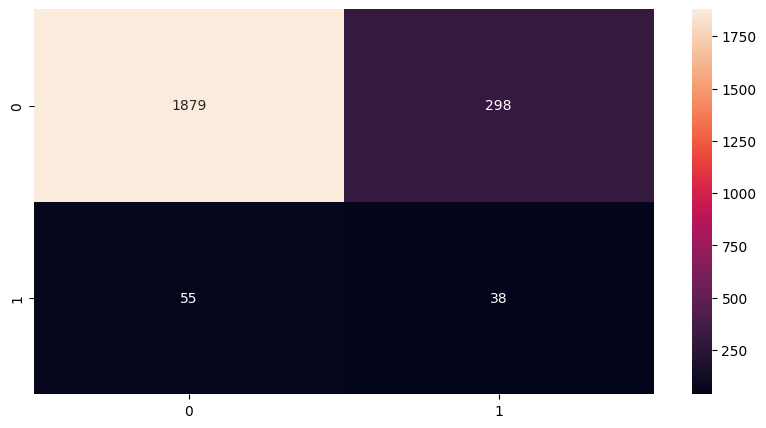

In [64]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt=".0f")

In [65]:
pd.DataFrame({
    '':['Recall', 'Precision', 'ROC-AUC', 'Accuracy'],
    'Score': [
        recall_score(y_test, y_pred_test),
        precision_score(y_test, y_pred_test),
        roc_auc_score(y_test, y_pred_test),
        accuracy_score(y_test, y_pred_test)
    ]
})

,,Score
0,Recall,0.408602
1,Precision,0.113095
2,ROC-AUC,0.635858
3,Accuracy,0.844493


In [66]:
print(estimator,'\n', classification_report(y_test,y_pred_test))

Pipeline(steps=[('scaler', RobustScaler()), ('resample', SMOTE()),
                ('algorithm', LGBMClassifier())]) 
               precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      2177
         1.0       0.11      0.41      0.18        93

    accuracy                           0.84      2270
   macro avg       0.54      0.64      0.55      2270
weighted avg       0.94      0.84      0.88      2270



### Tuning Process

In [67]:
# model
pipe_model = Pipeline ([
            ('scaler', scaler),
            ('balance', smote),
            ('clf', logreg)
])

#metode cross validation
skf = StratifiedKFold(n_splits=5)

#hyperparameter
hyperparam = {
    'clf__penalty':['l1', 'l2', 'elasticnet', 'none'],
    'clf__C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005],
    'clf__solver':['lbfgs','newton-cg','liblinear','sag','saga'],
    'clf__max_iter' : [100,200,300,400,500,1000]
}

grid_search = GridSearchCV(
    pipe_model,
    param_grid = hyperparam, 
    cv = skf,
    scoring = 'roc_auc',
    n_jobs = 1
)

model_tuned = grid_search.fit(x_train_selected, y_train)
model_tuned
# default : C=1.0, solver=lbfgs, balance__k_neighbors = 5

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('balance', SMOTE()),
                                       ('clf',
                                        LogisticRegression(random_state=2023))]),
             n_jobs=1,
             param_grid={'clf__C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1,
                                    0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001,
                                    5e-05],
                         'clf__max_iter': [100, 200, 300, 400, 500, 1000],
                         'clf__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'clf__solver': ['lbfgs', 'newton-cg', 'liblinear',
                                         'sag', 'saga']},
             scoring='roc_auc')

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
# Define objects
scaler = StandardScaler()
smote = SMOTE(random_state=42)
logreg = LogisticRegression()

# Pipeline
pipe_model = Pipeline([
    ('scaler', scaler),
    ('balance', smote),
    ('clf', logreg)
])

# Cross-validation
skf = StratifiedKFold(n_splits=5)

# Hyperparameters
hyperparam = {
    'clf__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'clf__C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005],
    'clf__solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'clf__max_iter': [100, 200, 300, 400, 500, 1000]
}

# GridSearchCV
grid_search = GridSearchCV(
    pipe_model,
    param_grid=hyperparam,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1  # Ensure all objects are pickleable; otherwise, set n_jobs=1
)

# Fit the model
model_tuned = grid_search.fit(x_train_selected, y_train)

In [70]:
best_tuning = model_tuned.best_estimator_
pd.DataFrame({
    '':['Best Score', 'Best Params'],
    ' ': [model_tuned.best_score_, model_tuned.best_params_]
})

,,
0,Best Score,0.77754
1,Best Params,"{'clf__C': 0.005, 'clf__max_iter': 400, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}"


In [71]:
result = pd.DataFrame(model_tuned.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__max_iter,param_clf__penalty,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034184,0.003453,0.000000,0.000000,1000.0,100,l1,lbfgs,"{'clf__C': 1000, 'clf__max_iter': 100, 'clf__penalty': 'l1', 'clf__solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,673
1,0.032830,0.002445,0.000000,0.000000,1000.0,100,l1,newton-cg,"{'clf__C': 1000, 'clf__max_iter': 100, 'clf__penalty': 'l1', 'clf__solver': 'newton-cg'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,673
2,0.254545,0.023988,0.007807,0.002064,1000.0,100,l1,liblinear,"{'clf__C': 1000, 'clf__max_iter': 100, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}",0.785595,0.788727,0.772713,0.745663,0.769781,0.772496,0.015247,500
3,0.035779,0.002820,0.000000,0.000000,1000.0,100,l1,sag,"{'clf__C': 1000, 'clf__max_iter': 100, 'clf__penalty': 'l1', 'clf__solver': 'sag'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,673
4,0.283760,0.016018,0.007430,0.002560,1000.0,100,l1,saga,"{'clf__C': 1000, 'clf__max_iter': 100, 'clf__penalty': 'l1', 'clf__solver': 'saga'}",0.785595,0.788719,0.772705,0.745694,0.769797,0.772502,0.015235,416


### After Tuning

In [72]:
best_tuning.fit(x_train_selected, y_train)
Y_pred_train = best_tuning.predict(x_train_selected)
Y_pred_test = best_tuning.predict(x_test_selected)

pd.DataFrame({
    '':['Train Score', 'Test Score'],
    'Score': [roc_auc_score(y_train,Y_pred_train), roc_auc_score(y_test,Y_pred_test)]
})

,,Score
0,Train Score,0.718323
1,Test Score,0.715143


<Axes: >

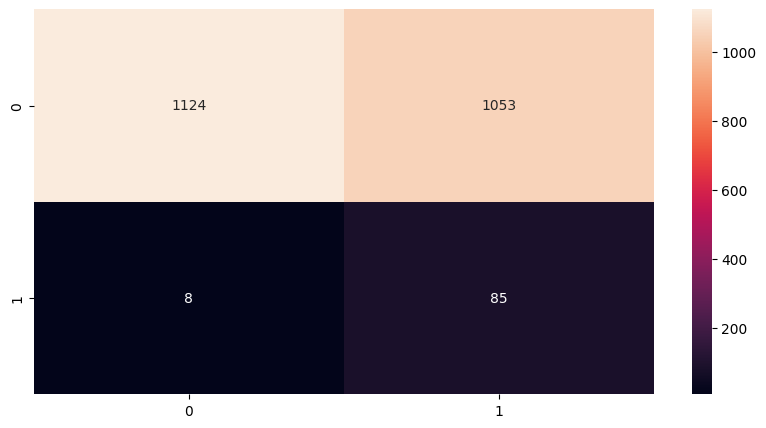

In [73]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, Y_pred_test), annot=True, fmt=".0f")

In [74]:
pd.DataFrame({
    '':['Recall', 'Precision', 'ROC-AUC', 'Accuracy'],
    'Score': [
        recall_score(y_test, Y_pred_test),
        precision_score(y_test, Y_pred_test),
        roc_auc_score(y_test, Y_pred_test),
        accuracy_score(y_test, Y_pred_test)
    ]
})

,,Score
0,Recall,0.913978
1,Precision,0.074692
2,ROC-AUC,0.715143
3,Accuracy,0.532599


In [75]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

         0.0       0.99      0.52      0.68      2177
         1.0       0.07      0.91      0.14        93

    accuracy                           0.53      2270
   macro avg       0.53      0.72      0.41      2270
weighted avg       0.96      0.53      0.66      2270



Model Logistic regression setelah tuning memiliki hasil evaluasi yang lebih baik daripada model sebelum tuning.

Confusion Matrix:

- Jumlah pelaku perjalanan yang mengajukan Claim dan berhak menerima Claim (True Positive): 85
- Jumlah pelaku perjalanan yang mengajukan Claim namun tidak berhak menerima Claim (False Negative): 8
- Jumlah pelaku perjalanan yang tidak mengajukan Claim dan tidak berhak menerima Claim (True Negative): 1125
- Jumlah pelaku perjalanan yang tidak mengajukan Claim namun berhak menerima Claim (False Positive): 1052
- Jumlah pelaku perjalanan yang berhak menerima Claim: 85 + 1052 = 1137
- Jumlah pelaku perjalanan yang tidak berhak menerima Claim: 1125 + 8 = 1133

Hasil Evaluasi:

- Recall: 91% dari semua pelaku perjalanan yang berhak menerima Claim berhasil diprediksi dengan benar
- Precision: Hanya 7% dari semua pelaku perjalanan yang mengajukan Claim berhasil diprediksi dengan benar
- ROC and Accuracy: 53% dari semua pelaku perjalanan yang dites berhasil diprediksi dengan benar

Oleh karena itu, model yang digunakan adalah model Logistic Regression yang telah dilakukan Scaling, Oversampling, Feature Selection, dan Hyperparameter Tuning.

### Saving Model

Mari kita simpan penerapan model terbaik untuk nanti nya bisa di deploy ke Production yg digunakan dalam project ini

In [76]:
pickle.dump(estimator, open('travel_insurance_best_model.pkl', 'wb'))

Perlu di ingat, "Best model" hanyalah titik awal dalam pengembangan model. Selalu ada ruang untuk perbaikan dan optimasi. Dengan melakukan langkah-langkah seperti oversampling, undersampling, class weighting, dan mencoba model yang berbeda, Anda dapat meningkatkan kinerja model dan mendapatkan hasil yang lebih baik. Menyimpan model dalam pickle tetap bermanfaat meskipun ada langkah selanjutnya, karena memberikan fleksibilitas dan dokumentasi yang berguna.

# **Feature Importance**

Mari kita lihat fitur mana yang paling signifikan dalam mempengaruhi prediksi status klaim (Claim), dengan Menggunakan koefisien fitur untuk mengidentifikasi seberapa besar pengaruh setiap fitur. Koefisien fitur diinterpretasikan dengan membandingkan nilai absolutnya.

In [77]:
model = LogisticRegression()
model.fit(x_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

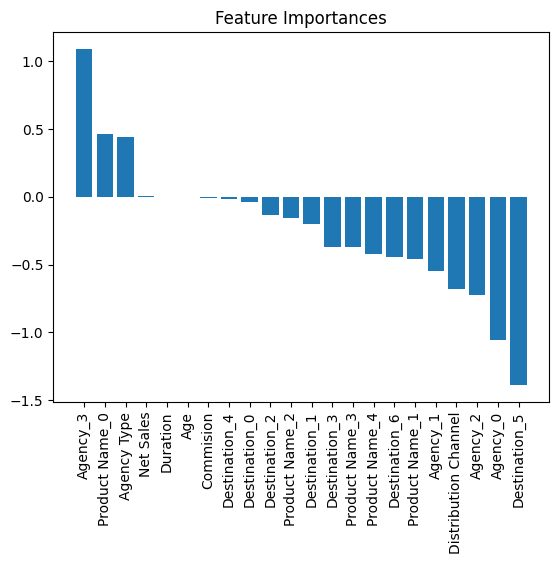

In [78]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature Importances')
plt.xticks(rotation='vertical')
plt.show()

Terlihat bahwa ternyata untuk model Logistic Regression kita, fitur/kolom Agency adalah yang paling penting, kemudian diikuti dengan Product Name, Agency Type, dan selanjutnya.

Nanti kedepannya sebenarnya kolom Destination harus dihapus bila model yang kita buat ini ingin digunakan untuk memprediksi calon pelaku perjalanan yang akan mengajukan dan menerima Claim. Berarti model yang kita buat ini yg akan kita sarankan kepada WLI untuk mengembangkan bisnis nya sebagai acuan untuk memulai produk-produk travel yg berpotensi tinggi profit. 

# **Conclusion and Recomendations**

In [79]:
print(classification_report(y_test,Y_pred_test))

              precision    recall  f1-score   support

         0.0       0.99      0.52      0.68      2177
         1.0       0.07      0.91      0.14        93

    accuracy                           0.53      2270
   macro avg       0.53      0.72      0.41      2270
weighted avg       0.96      0.53      0.66      2270



## Kesimpulan

Berdasarkan hasil classification report :

1. Class 0 (Tidak Berhak untuk Claim):
    * Model sangat jarang salah saat memprediksi seseorang tidak berhak untuk claim (0.99). Artinya, hampir semua prediksi class 0 benar.
    * Model dapat mengurangi 52% calon pelaku perjalanan yang tidak berhak untuk menerima Claim, dan dapat mendapatkan 91% calon pelaku perjalanan yang berhak untuk menerima Claim.    
2. Class 1 (Berhak untuk Claim):
    * Ketepatan prediksi yang berhak menerima Claim hanya 7%. Maka 48% dari keseluruhan calon pelaku perjalanan tidak menerima Claim namun sudah mengajukan Claim.
    * Model sangat baik dalam mendeteksi individu yang benar-benar berhak untuk claim (91%). Artinya ini bisa menjadi acuan dalam penerapan Produk yang akan di gunakan oleh WLI.

* Precision Rendah pada Class 1: Model sering memprediksi class 1 secara salah. Ini berbahaya dalam konteks bisnis asuransi karena bisa     
    menyebabkan kerugian finansial (misalnya, menyetujui claim yang tidak valid)

## Rekomendasi & Improvisasi

Sebagai startup asuransi, tujuan utama adalah memperoleh keuntungan. Untuk itu, perlu dipertimbangkan beberapa faktor berdasarkan data ini:

- Fokus pada Produk dengan Tingkat Klaim Rendah: Perusahaan sebaiknya lebih fokus pada produk seperti "Spouse or Parents Comprehensive Plan" dan "Silver Plan". Produk-produk ini memiliki potensi untuk menghasilkan profitabilitas yang lebih tinggi karena tingkat klaim yang lebih rendah.

- Evaluasi Kembali Produk dengan Tingkat Klaim Tinggi: Produk seperti "Annual Silver Plan" perlu dievaluasi lebih lanjut. Perusahaan dapat mempertimbangkan untuk:
    - Menyesuaikan Premi: Menaikkan premi untuk produk ini agar lebih seimbang dengan tingkat klaim.
    - Membatasi Manfaat: Mengurangi cakupan manfaat untuk menurunkan risiko klaim.
    - Menargetkan Segmen Pasar yang Berbeda: Mengubah target pasar untuk produk ini agar menarik nasabah dengan profil risiko yang lebih rendah.

- Analisis Lebih Lanjut:
    - Analisis Segmen: Lakukan analisis lebih lanjut untuk mengidentifikasi segmen nasabah yang paling menguntungkan untuk setiap produk.
    - Analisis Faktor Risiko: Identifikasi faktor-faktor yang mempengaruhi tingkat klaim, seperti usia, jenis kelamin, riwayat kesehatan, dan kebiasaan hidup.
    - Perbandingan dengan Pasar: Bandingkan produk dan tingkat klaim perusahaan dengan kompetitor untuk mendapatkan gambaran yang lebih komprehensif.

- WLI bisa Mewajibkan seluruh calon pelaku perjalanan yang mengajukan Claim asuransi untuk mengisi data secara lengkap, termasuk kolom Gender. Kita seharusnya bisa mengisi data kosong dengan variabel Gender acak, namun bisa membuang waktu dan kinerja perusahaan untuk menganalisis puluhan ribu baris data termasuk sekitar 30.000 data yang memiliki nilai kosong, dan juga bisa menaikkan jumlah calon pelaku perjalanan yang tidak berhak menerima Claim dan akibatnya menyia-nyiakan kinerja perusahaan memberikan Claim untuk asuransi yg tidak berhak.

- Menambahkan fitur dan kolom baru yang berhubungan dengan pengajuan Claim asuransi seperti nama calon pelaku perjalanan, tanggal pengajuan asuransi, harga, dan syarat dan ketentuan (Terms and Conditions).

- Melakukan pembebanan berlebih untuk fitur kuantitatif seperti durasi perjalanan, umur calon pelaku perjalanan, dan komisi.

- Penting untuk memahami profil nasabah yang membeli masing-masing produk. Apakah mereka memiliki riwayat kesehatan yang berbeda? Apakah mereka lebih sering melakukan perjalanan? Informasi ini dapat membantu mengidentifikasi faktor-faktor yang mempengaruhi tingkat klaim.

- Feature Importance harus difokuskan kepada fitur kuantitatif, bukan fitur kualitatif.

- Mencoba menggunakan algoritma, model dan metrik Machine Learning yang lain, mencoba kembali Hyperparameter Turning, dan menggunakan teknik Resampler yang berbeda.

baca juga :
- [Pricing Strategies](https://ancileo.com/pricing-strategies-balancing-profitability-and-competitiveness-in-travel-insurance/)
- [Business Strategy for Startup Company ](https://bolttech.io/id/insights/perencanaan-untuk-sukses-cara-membuat-rencana-bisnis-saat-memulai-agen-asuransi-independen-anda/)

## Next Steps
 * Terapkan teknik oversampling/undersampling.
 * Ulangi pelatihan model dengan class weighting atau model lain yang lebih sesuai.
 * Evaluasi hasil kembali menggunakan metrik seperti F1-score, precision-recall curve, dan ROC-AUC untuk memastikan model lebih seimbang dalam menangani kedua kelas.